# Домашняя работа 2

В данной работе я буду продолжать работу с выбранным ранее датасетом.

В данном датасете представлены результаты всех команд из американской баскетбольной лиги NCAA за 2013-2019 года и продвинутая статистика по их выступлениям. 

March Madness - турнир, которым завершается сезон. В него попадают только лучшие команды регулярного чемпионата

## Описание данных

### Базовые данные о команде

YEAR: Сезон

TEAM: Название школы, которую команда представляет

CONF: Название конференции, в которой играла команда (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference)

G: Количество сыгранных игр

W: Количество выигранных игр

### Игровые показатели команды

ADJOE: Скорректированная эффективность атаки (оценка эффективности атаки (очков, набранных за 100 владений), которую команда имела бы против средней защиты). **Чем выше данный показатель - тем лучше атака команды**

ADJDE: Скорректированная эффективность защиты (оценка эффективности защиты (разрешенные очки за 100 владений), которую команда имела бы против среднего уровня нападения). **Чем выше данный показатель - тем хуже защита команды**

BARTHAG:  Рейтинг силы (шанс победить среднюю команду)

EFG_O: Процент результативных бросков с игры

EFG_D: Процент реализации бросков с игры у команды соперника

TOR: Допущенный процент потерь

TORD: Процент потерь у команды соперника

ORB: Процент подборов в атаке

DRB: Процент подборов в атаке у команды соперника

FTR : Частота штрафных бросков (как часто данная команда выполняет штрафные броски)

FTRD: Частота штрафных бросков у команды соперника (как часто команде выполняют штрафные броски)

2P_O: процент попаданий 2х очковых бросков

2P_D: процент попаданий 2х очковых бросков у команды соперника

3P_O: процент попаданий 3х очковых бросков

3P_D: процент попаданий 3х очковых бросков у команды соперника

ADJ_T: Скорректированный темп (оценка темпа (владения за 40 минут), который команда имела бы против команды, которая играет в среднем темпе)

### Результаты игры команды

WAB: Победы выше пузыря (Пузырь - грань между участием в March Madness и неучастием в нем)

POSTSEASON: Раунд, в котором данная команда выбыла или где закончился их сезон (R68 = Предварительный раунд, R64 = 1/32 финала, R32 = 1/16 финала, S16 = 1/8 финала, E8 = 1/4 финала, F4 = полуфинал, 2ND = занявший второе место, Champion = победитель March Madness за данный год)

SEED: Посев в начале турнира March Madness

## Цель

определить зависимость результатов команды от посева, а также от эффективности атаки, защиты, и других показателей

## Работа с данными

импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats


прочитаем файл

In [2]:
df = pd.read_csv('/Users/vasek/Downloads/archive/cbb.csv')

In [3]:
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


In [4]:
df.shape

(2455, 24)

### работа с пропущенными значениями

для начала посмотрим типы переменных и узнаем, сколько у нас пропущенных значений

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2455 entries, 0 to 2454
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        2455 non-null   object 
 1   CONF        2455 non-null   object 
 2   G           2455 non-null   int64  
 3   W           2455 non-null   int64  
 4   ADJOE       2455 non-null   float64
 5   ADJDE       2455 non-null   float64
 6   BARTHAG     2455 non-null   float64
 7   EFG_O       2455 non-null   float64
 8   EFG_D       2455 non-null   float64
 9   TOR         2455 non-null   float64
 10  TORD        2455 non-null   float64
 11  ORB         2455 non-null   float64
 12  DRB         2455 non-null   float64
 13  FTR         2455 non-null   float64
 14  FTRD        2455 non-null   float64
 15  2P_O        2455 non-null   float64
 16  2P_D        2455 non-null   float64
 17  3P_O        2455 non-null   float64
 18  3P_D        2455 non-null   float64
 19  ADJ_T       2455 non-null  

In [6]:
df.isnull().sum()

TEAM             0
CONF             0
G                0
W                0
ADJOE            0
ADJDE            0
BARTHAG          0
EFG_O            0
EFG_D            0
TOR              0
TORD             0
ORB              0
DRB              0
FTR              0
FTRD             0
2P_O             0
2P_D             0
3P_O             0
3P_D             0
ADJ_T            0
WAB              0
POSTSEASON    1979
SEED          1979
YEAR             0
dtype: int64

у нас есть 1979 пропущенных значений в колонках SEED и POSTSEASON - это все команды, которые в период 2013-2019 годов не выходили в элитный раунд March Madness. соответственно, они заканчивали сезон ранее, а потому - не получали номер посева. 

изучим чуть детальнее, как эти данные влияют на наш анализ

изначально мы имеем данные о 476 командах, которые прошли в элитный раунд и 1979 - которые не прошли. посмотрим агрегированные данные по основным статистическим показателям - атакующему, защитному рейтингам. 
также, посмотрим на процент побед этих команд

In [9]:
df['ADJOE'].describe()

count    2455.000000
mean      103.304481
std         7.376981
min        76.600000
25%        98.300000
50%       103.000000
75%       108.000000
max       129.100000
Name: ADJOE, dtype: float64

In [10]:
df['ADJDE'].describe()

count    2455.000000
mean      103.304603
std         6.605318
min        84.000000
25%        98.500000
50%       103.500000
75%       107.900000
max       124.000000
Name: ADJDE, dtype: float64

худший атакующий рейтинг сейчас - 76. защитный - 124

средний атакующий рейтинг всех команд 103 и примерно такие же показатели среднего защитного рейтинга

### добавим переменную, которая будет отражать процент побед

так как сезон длинный и состоит как из нескольких частей, включая турнир на выбывание, интересно посмотреть корреляцию процента побед с итоговым результатом

In [11]:
df['W_ratio'] = df['W'] / df['G']

изучим подробнее данный показатель

In [12]:
df['W_ratio'].describe()

count    2455.000000
mean        0.508203
std         0.179726
min         0.000000
25%         0.379310
50%         0.516129
75%         0.636364
max         0.974359
Name: W_ratio, dtype: float64

можно заметить, что сейчас минимальный процент - 0, что ознчает, что какая-то команда не победила ни разу. 
среднее значения - 50%, что в целом логично (нормальное распределение), но не дает нам никакой информации. 

если каким-либо образом заполнять эти значения, то мы очень сильно повлияем на дальнейшие анализы, а потому лучшим способом тут будет просто удалить данные пропуски, и продолжить работу только с командами, которые отобрались в Мартовское безумие

In [13]:
df=df.dropna()

**посмотрим теперь, как повлияет очистка данных на эти показатели**

In [14]:
df['ADJOE'].describe()

count    476.000000
mean     111.505882
std        6.357766
min       90.600000
25%      107.375000
50%      111.600000
75%      115.825000
max      129.100000
Name: ADJOE, dtype: float64

In [15]:
df['ADJDE'].describe()

count    476.000000
mean      96.656092
std        5.405018
min       84.000000
25%       93.100000
50%       96.200000
75%      100.100000
max      115.600000
Name: ADJDE, dtype: float64

In [16]:
df['W_ratio'].describe()

count    476.000000
mean       0.717087
std        0.101970
min        0.363636
25%        0.636364
50%        0.718750
75%        0.787879
max        0.974359
Name: W_ratio, dtype: float64

средний процент побед команды, отобравшейся в мартовское безумие - 71%

минимальный процент побед при отборе в мартовское безумие - 36%

#### результаты:
    
средний атакующий рейтинг вырос на 8
средний защитный рейтинг снизился 7
средний процент побед увеличился до 71%

если сравнивать, то средняя команда NCAA в сезонах 2013-2019 имела защитный рейтинг 103, атакующий рейтинг 103 и побеждала 50% игр

за этот же период средняя команда, которая отбиралась в мартовское безумие имела защитный рейтинг 96, атакующий рейтинг 111 и побеждала 71% игр

посмотрим итоговый набор данных в колонке POSTSEASON

In [17]:
df['POSTSEASON'].value_counts()

R64          224
R32          112
S16           56
E8            28
R68           28
F4            14
2ND            7
Champions      7
Name: POSTSEASON, dtype: int64


таким образом мы получили данные команд, которые гораздо лучше играют и в обороне и в атаке, и теперь можем оценить влияние отдельных факторов на их успех


## подготовка данных

### результаты сезона

для удобства анализа переведем результат команды в чемпионате в цифровые показатели:
начиная от 1 (R68) и заканчивая 10 (champions)

In [18]:
def post_result(x): 
    if x == 'R68':
        return 1
    elif x == 'R64':
        return 2
    elif x == 'R32':
        return 3
    elif x == 'S16':
        return 4
    elif x == 'E8':
        return 5
    elif x == 'F4':
        return 6
    elif x == '2ND':
        return 7
    else: 
        return 10 
 
df['post_result'] = df['POSTSEASON'].apply(post_result)

In [19]:
df['post_result'].value_counts()

2     224
3     112
4      56
5      28
1      28
6      14
7       7
10      7
Name: post_result, dtype: int64

также добавим переменную, которая будет показывать попала ли команда в лучшие 4 команды в сезоне

In [20]:
def post_final4(x): 
    if x == '2ND':
        return 1
    elif x == 'Champions':
        return 1
    elif x == 'F4':
        return 1
    else: 
        return 0 
 
df['post_final4'] = df['POSTSEASON'].apply(post_final4)

In [21]:
df.sort_values(by='W_ratio').tail(10)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,W_ratio,post_result,post_final4
2131,Gonzaga,WCC,34,31,118.9,90.2,0.9599,54.9,44.9,17.2,...,36.5,32.9,65.1,7.6,R32,1.0,2013,0.911765,3,0
2091,Buffalo,MAC,35,32,113.6,95.3,0.8819,53.4,47.3,16.0,...,33.7,29.3,74.9,5.5,R32,6.0,2019,0.914286,3,0
2073,Villanova,BE,36,33,121.9,91.1,0.9663,55.3,45.5,16.3,...,38.9,30.5,64.7,11.3,R32,1.0,2015,0.916667,3,0
32,Gonzaga,WCC,37,34,120.2,93.1,0.9498,57.9,44.2,16.1,...,40.0,33.0,65.2,7.8,E8,2.0,2015,0.918919,5,0
8,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,39.5,28.9,60.7,11.1,Champions,1.0,2019,0.921053,10,1
52,Florida,SEC,39,36,115.9,88.4,0.9575,52.2,45.4,17.5,...,35.9,33.0,63.1,11.7,F4,1.0,2014,0.923077,6,1
2104,Wofford,SC,32,30,116.4,97.1,0.8892,57.5,49.9,16.1,...,41.4,32.6,67.1,4.0,R32,7.0,2019,0.937500,3,0
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,38.2,29.0,71.5,7.7,2ND,1.0,2017,0.948718,7,1
2115,Wichita St.,MVC,35,34,116.4,93.0,0.9295,52.4,44.7,16.2,...,35.0,31.1,65.1,8.1,R32,1.0,2014,0.971429,3,0
49,Kentucky,SEC,39,38,120.3,84.0,0.9842,51.5,39.6,16.3,...,34.9,27.1,63.5,13.1,F4,1.0,2015,0.974359,6,1


## добавим переменные

### Показатели атакующей и защитной эффективности команд

добаим основные показатели атакующей и защитной эффективности, чтобы в дальнейшем понять, что важнее для успеха команды - хорошая защита или хорошая атака

 перед началом категоризации данных определим бенчмарки

### Атакующий рейтинг

In [22]:
df['ADJOE'].describe()

count    476.000000
mean     111.505882
std        6.357766
min       90.600000
25%      107.375000
50%      111.600000
75%      115.825000
max      129.100000
Name: ADJOE, dtype: float64

в данной переменной отражена категоризация команд по их атакующему рейтингу

In [23]:
def offensive_rating (OF_EF):
    if OF_EF >= 120: 
        return 'Best offense'
    elif OF_EF >= 114:
        return 'Good offense'
    elif OF_EF >= 109:
        return 'Regular offense'
    elif OF_EF >= 104:
        return 'Bad offense'
    elif OF_EF < 104:
        return 'Worst offense'
    else:
        return 'N/A'
    
df['offensive rating']=df['ADJOE'].apply(offensive_rating)


In [24]:
df['offensive rating'].value_counts()

Regular offense    148
Good offense       120
Bad offense        104
Worst offense       58
Best offense        46
Name: offensive rating, dtype: int64

### Защитный рейтинг

In [25]:
df['ADJDE'].describe() 

count    476.000000
mean      96.656092
std        5.405018
min       84.000000
25%       93.100000
50%       96.200000
75%      100.100000
max      115.600000
Name: ADJDE, dtype: float64

In [26]:
df['offensive rating']=pd.Categorical(df['offensive rating'])

In [27]:
def defensive_rating (DF_EF):
    if DF_EF <= 90: 
        return 'Best defense'
    elif DF_EF <= 94:
        return 'Good defense'
    elif DF_EF <= 99:
        return 'Regular defense'
    elif DF_EF <= 104:
        return 'Bad defense'
    elif DF_EF > 104:
        return 'Worst defense'
    else:
        return 'else'
df['defensive rating']=df['ADJDE'].apply(defensive_rating)

In [28]:
df['defensive rating'].value_counts()

Regular defense    177
Bad defense        107
Good defense       106
Best defense        46
Worst defense       40
Name: defensive rating, dtype: int64

In [29]:

df['defensive rating']=pd.Categorical(df['defensive rating'])

###  Рейтинг темпа команд

данный показатель интересен для анализа
изначальная гипотеза заключается в том, что команды с низким рейтингом будут иметь более хорошую защитную эффективность и более низкую атакующую. 


In [30]:
df['ADJ_T'].describe()

count    476.000000
mean      67.601471
std        3.216978
min       58.400000
25%       65.375000
50%       67.600000
75%       69.900000
max       77.300000
Name: ADJ_T, dtype: float64

In [31]:
def tempo (TP):
    if TP <= 66: 
        return 'Slow Temp'
    elif TP <= 70:
        return 'Regular Temp'
    elif TP > 70:
        return 'Fast temp'
    else:
        return 'else'
df['Tempo']=df['ADJ_T'].apply(tempo)

In [32]:
df['Tempo'].value_counts()

Regular Temp    215
Slow Temp       152
Fast temp       109
Name: Tempo, dtype: int64

In [33]:
df['Tempo']=pd.Categorical(df['Tempo'])

# Регрессионный анализ

создадим новый датасет, в котором будут только самые главные статистические показатели команд

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 0 to 2454
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   TEAM              476 non-null    object  
 1   CONF              476 non-null    object  
 2   G                 476 non-null    int64   
 3   W                 476 non-null    int64   
 4   ADJOE             476 non-null    float64 
 5   ADJDE             476 non-null    float64 
 6   BARTHAG           476 non-null    float64 
 7   EFG_O             476 non-null    float64 
 8   EFG_D             476 non-null    float64 
 9   TOR               476 non-null    float64 
 10  TORD              476 non-null    float64 
 11  ORB               476 non-null    float64 
 12  DRB               476 non-null    float64 
 13  FTR               476 non-null    float64 
 14  FTRD              476 non-null    float64 
 15  2P_O              476 non-null    float64 
 16  2P_D              476 non

In [35]:
df_new = df.drop(['TEAM', 'CONF', 'G', 'W', 'BARTHAG', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D',
                  '3P_O', '3P_D', 'WAB', 'POSTSEASON', 'YEAR', 'EFG_O', 'EFG_D',
                 'offensive rating', 'defensive rating', 'Tempo'], axis = 1)


In [36]:
df_new.head()

,ADJOE,ADJDE,ADJ_T,SEED,W_ratio,post_result,post_final4
0,123.3,94.9,71.7,1.0,0.825000,7,1
1,129.1,93.6,59.3,1.0,0.900000,7,1
2,114.4,90.4,65.9,3.0,0.825000,7,1
3,115.2,85.2,67.5,3.0,0.815789,7,1
4,117.8,86.3,71.5,1.0,0.948718,7,1


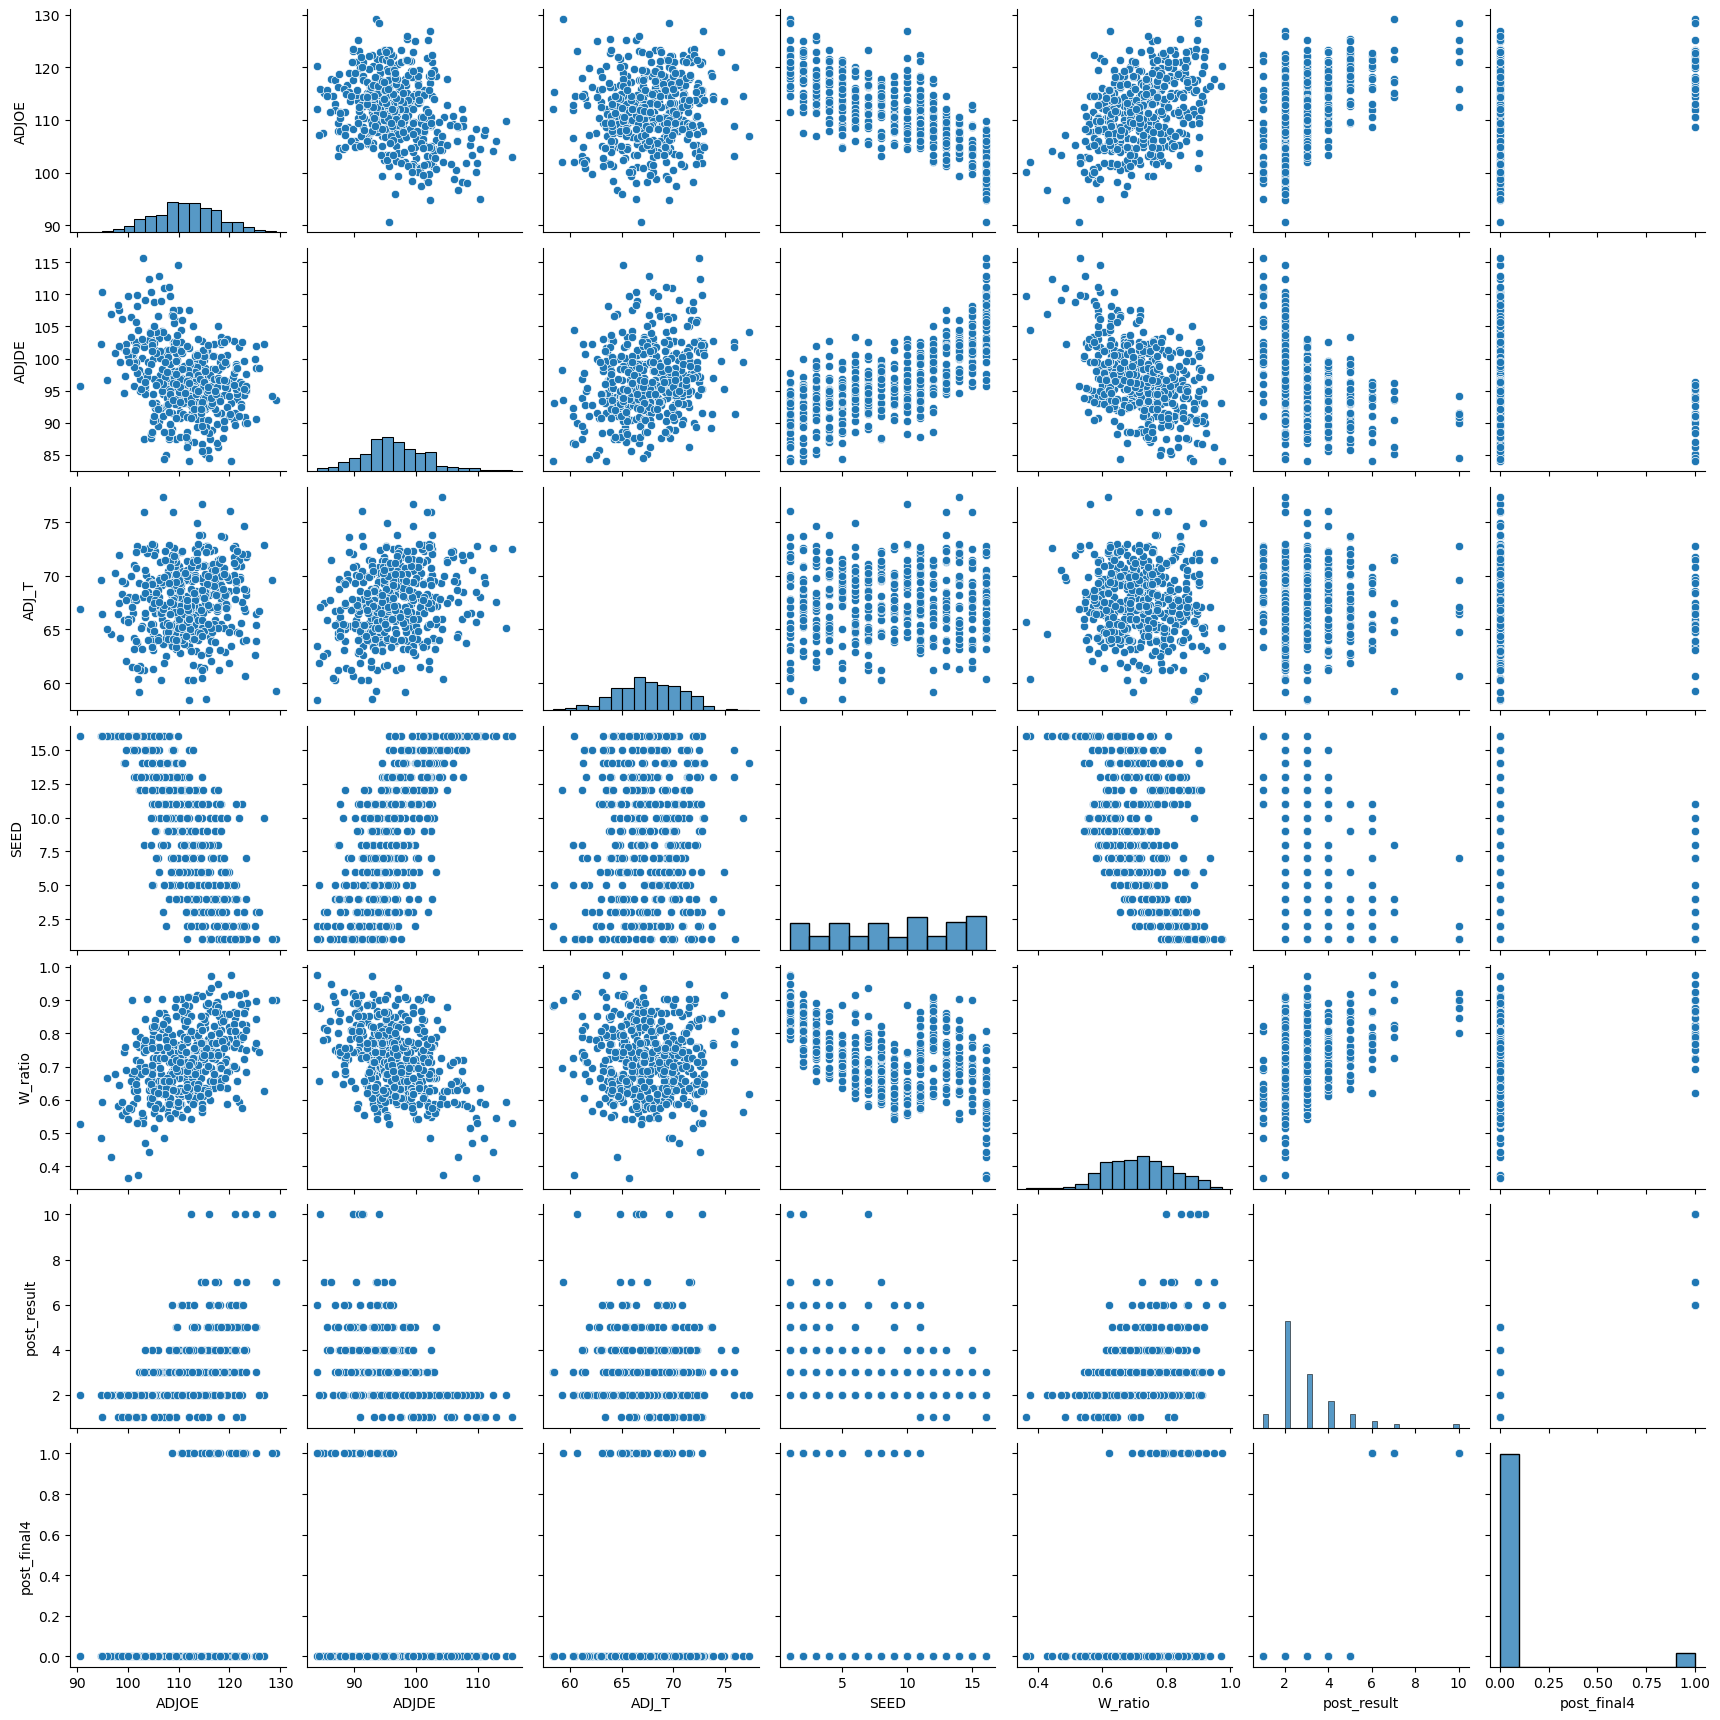

In [37]:
sns.pairplot(df_new)

In [38]:
df_new.select_dtypes('number').hist(bins=30, figsize=(10, 10));

построим матрицу корреляций и визуализируем её

In [39]:
df_new_cor = df_new.corr()
print(df_new_cor)


                ADJOE     ADJDE     ADJ_T      SEED   W_ratio  post_result  \
ADJOE        1.000000 -0.305698  0.104899 -0.745243  0.401993     0.515700   
ADJDE       -0.305698  1.000000  0.268281  0.697441 -0.439137    -0.464209   
ADJ_T        0.104899  0.268281  1.000000  0.045529 -0.055072    -0.092847   
SEED        -0.745243  0.697441  0.045529  1.000000 -0.497665    -0.575243   
W_ratio      0.401993 -0.439137 -0.055072 -0.497665  1.000000     0.434334   
post_result  0.515700 -0.464209 -0.092847 -0.575243  0.434334     1.000000   
post_final4  0.273625 -0.241218 -0.069018 -0.279951  0.263763     0.722476   

             post_final4  
ADJOE           0.273625  
ADJDE          -0.241218  
ADJ_T          -0.069018  
SEED           -0.279951  
W_ratio         0.263763  
post_result     0.722476  
post_final4     1.000000  


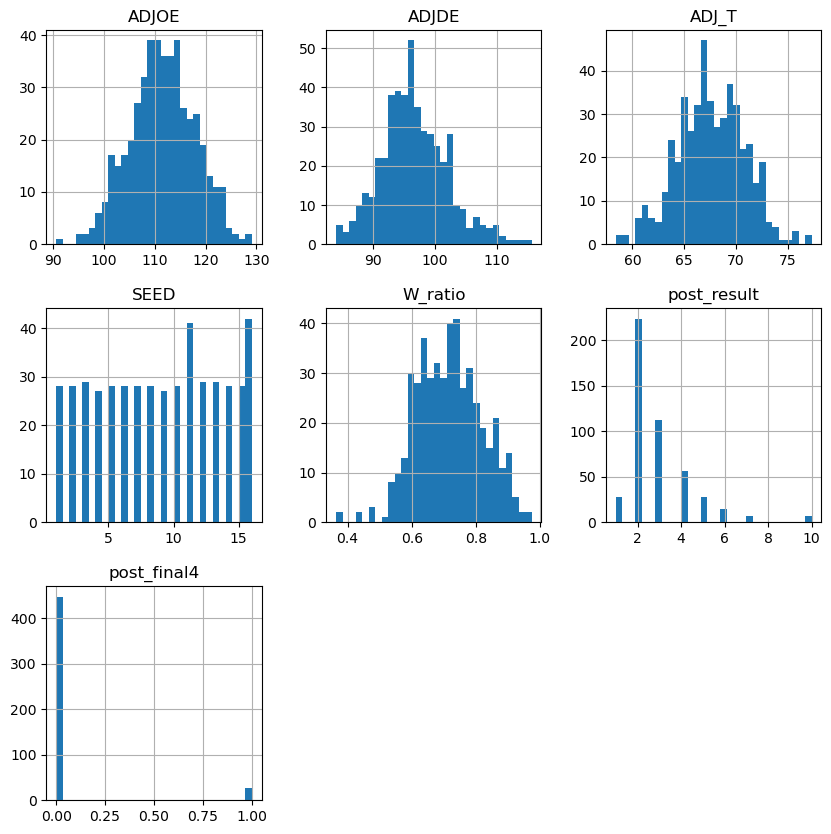

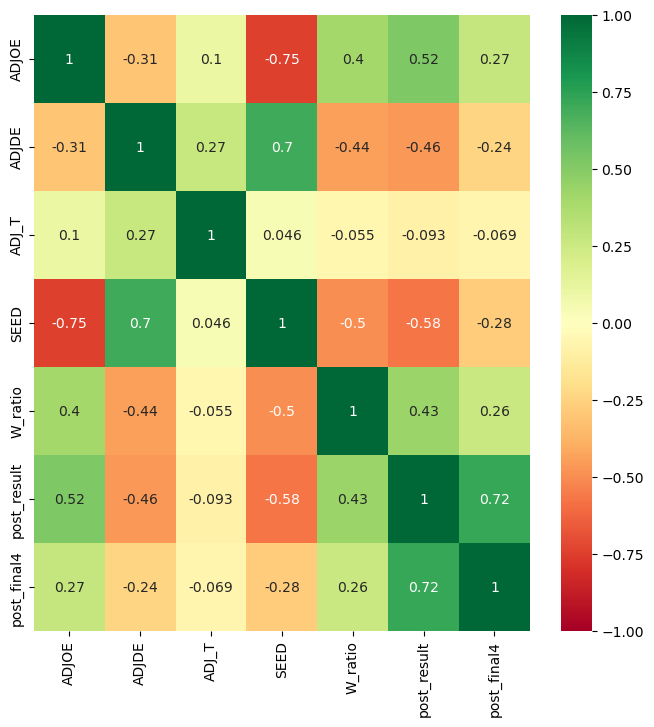

In [40]:
plt.figure(figsize =(8,8))
p=sns.heatmap(df_new.corr(), annot=True, cmap='RdYlGn', vmin=-1, vmax=1 )
plt.show()

можно заметить сильную корреляцию между номером посева и конечным результатом команды в сезоне. 
также, сильная взаимосвязь между рейтингом атаки и процентом победы команды 

на посев больше всего влияет атакующий рейтинг команды - чем выше он, тем лучше будет посев

наибольшая взаимосвязь итогового результата существует у посева команды

### Визуализация данных о переменной post_result - результатах команды в чемпионате

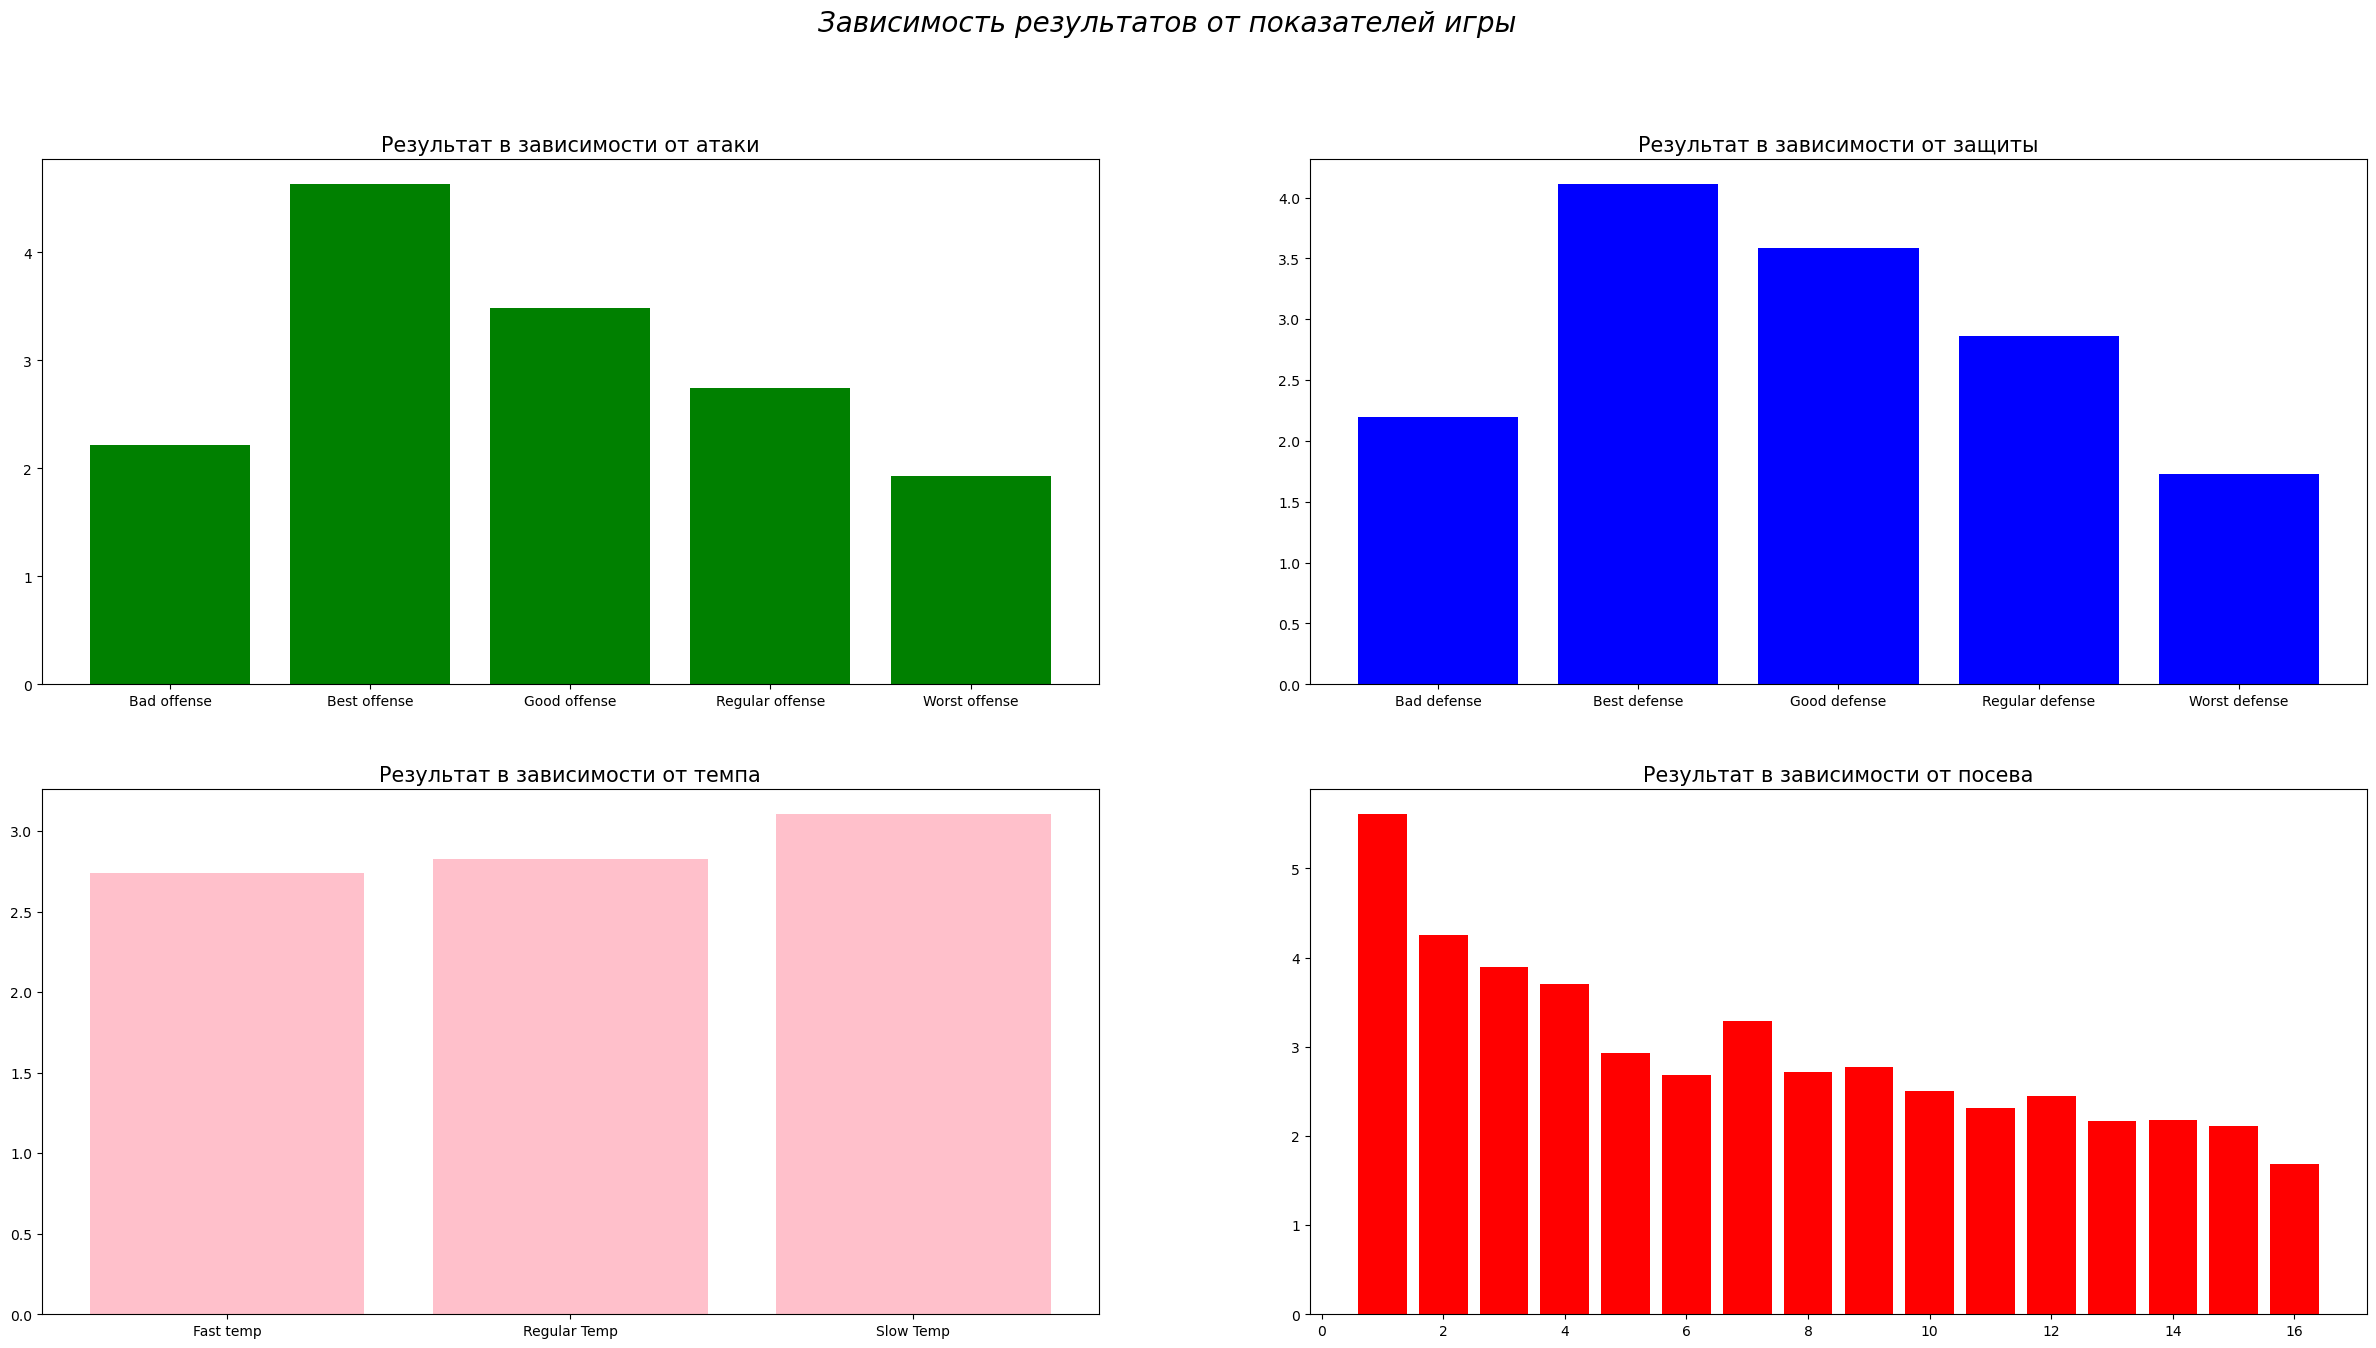

In [41]:
df_off_post = df.groupby('offensive rating')['post_result'].mean()
df_def_post = df.groupby('defensive rating')['post_result'].mean()
df_temp_post = df.groupby('Tempo')['post_result'].mean()
df_seed_post = df.groupby('SEED')['post_result'].mean()


fig, ax = plt.subplots(2, 2, figsize=(30, 15))
ax[0][0].bar(df_off_post.index, df_off_post, color='green')
ax[0][1].bar(df_def_post.index, df_def_post, color='blue')
ax[1][0].bar(df_temp_post.index, df_temp_post, color='pink')
ax[1][1].bar(df_seed_post.index, df_seed_post, color='red')

ax[0][0].set_title('Результат в зависимости от атаки', fontsize = 15)
ax[0][1].set_title('Результат в зависимости от защиты', fontsize = 15)
ax[1][0].set_title('Результат в зависимости от темпа', fontsize = 15)
ax[1][1].set_title('Результат в зависимости от посева', fontsize = 15)
fig.suptitle('Зависимость результатов от показателей игры', fontsize = 20, fontstyle = 'oblique')
plt.show()

## Линейная  регрессия

создадим новый датасет для более удобной работы с регрессией

In [42]:
df_post_reg = df.drop(['TEAM', 'CONF', 'G', 'W', 'BARTHAG', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_D',
                   '3P_D', 'WAB', 'POSTSEASON', 'YEAR', 'SEED',
                 'offensive rating', 'defensive rating', 'Tempo'], axis = 1)

In [43]:
df_post_reg.head()

,ADJOE,ADJDE,EFG_O,EFG_D,2P_O,3P_O,ADJ_T,W_ratio,post_result,post_final4
0,123.3,94.9,52.6,48.1,53.9,32.7,71.7,0.825000,7,1
1,129.1,93.6,54.8,47.7,54.8,36.5,59.3,0.900000,7,1
2,114.4,90.4,53.9,47.7,54.7,35.2,65.9,0.825000,7,1
3,115.2,85.2,53.5,43.0,52.8,36.5,67.5,0.815789,7,1
4,117.8,86.3,56.6,41.1,56.3,38.2,71.5,0.948718,7,1


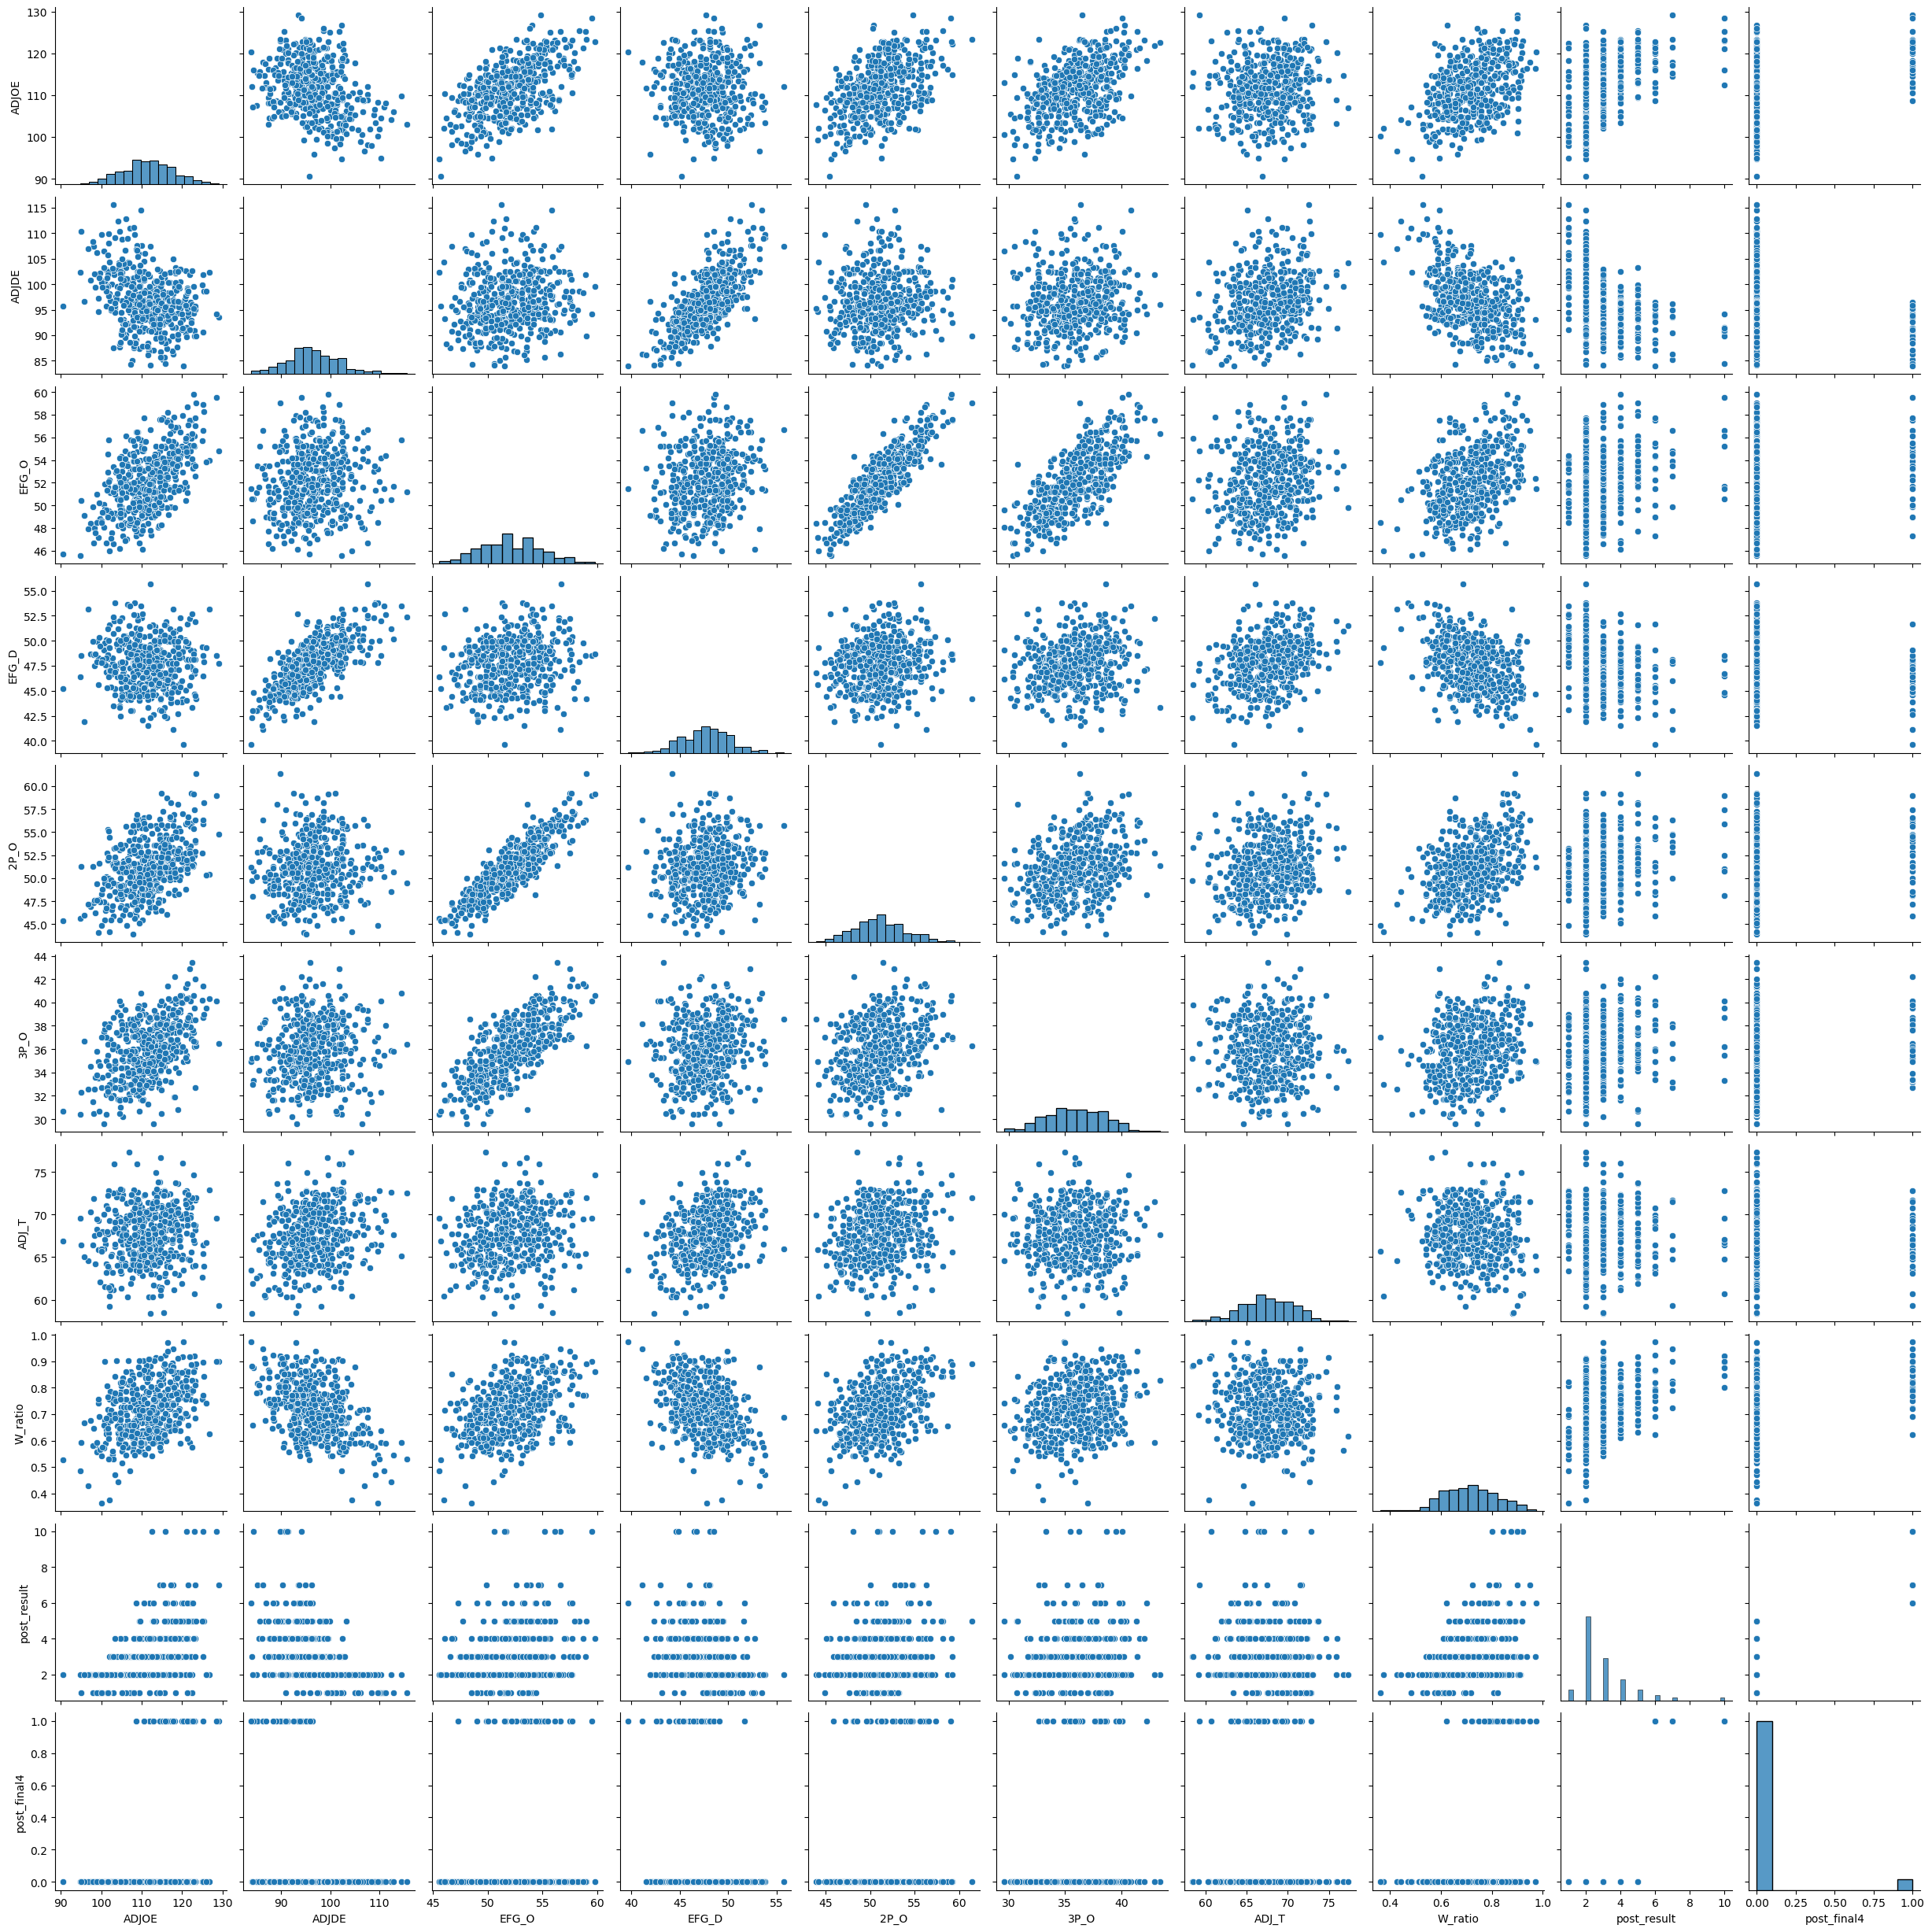

In [44]:
sns.pairplot(df_post_reg)
plt.show()

In [45]:
X_mult_1 = sm.add_constant(df_post_reg.drop('post_result', axis=1))
y_1 = df_post_reg['post_result']

model = sm.OLS(y_1, X_mult_1)
reg_1 = model.fit()
print(reg_1.summary())

                            OLS Regression Results                            
Dep. Variable:            post_result   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     116.2
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          3.99e-113
Time:                        20:49:17   Log-Likelihood:                -590.33
No. Observations:                 476   AIC:                             1201.
Df Residuals:                     466   BIC:                             1242.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3971      1.344      0.295      

## проверка качества

In [46]:
features_1 = df_post_reg.drop('post_result', axis=1)
y_1 = df_post_reg['post_result']

In [47]:
y_true_1 = y_1

In [48]:
from sklearn.linear_model import LinearRegression
regs_1 = LinearRegression().fit(features_1, y_1)

In [49]:
y_pred_1 = regs_1.predict(features_1)

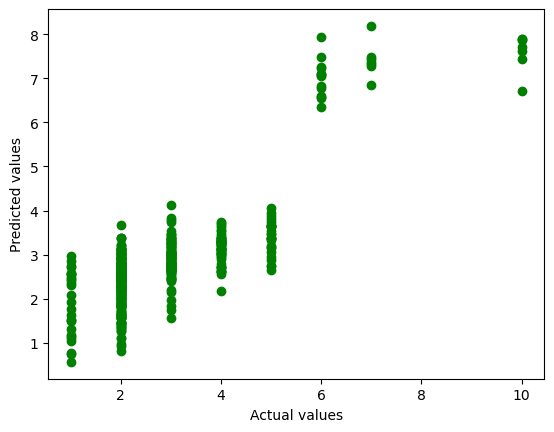

In [50]:
plt.scatter(y_1, y_pred_1, color = 'green')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [51]:
err_1 = y_1 - y_pred_1
err_d_1 = pd.DataFrame(data = err_1)

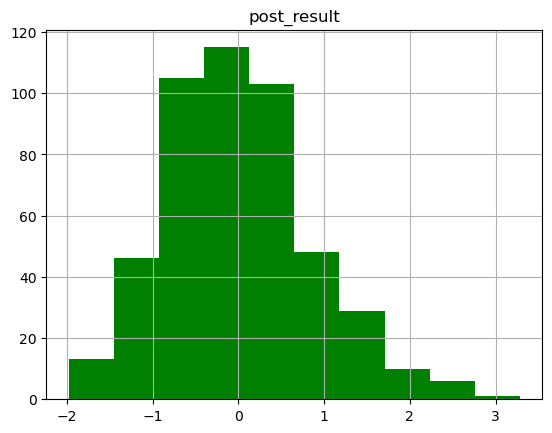

In [52]:
err_d_1.hist(color='green')
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing

print('MAE = %s' % mean_absolute_error(regs_1.predict(features_1),y_1))
print('MSE =', mean_squared_error(y_true_1, y_pred_1))
print('RMSE = %s' % mean_squared_error(regs_1.predict(features_1),y_1))
print('R-squared =', r2_score(y_1, y_pred_1))

MAE = 0.6587329261068916
MSE = 0.6994238793980044
RMSE = 0.6994238793980044
R-squared = 0.6917228082798234


## Логистическая регрессия

In [55]:
df_post_reg_log = df[['ADJOE', 'ADJDE',
                   'SEED', 'post_final4']]

In [56]:
df_post_reg_log.head()

,ADJOE,ADJDE,SEED,post_final4
0,123.3,94.9,1.0,1
1,129.1,93.6,1.0,1
2,114.4,90.4,3.0,1
3,115.2,85.2,3.0,1
4,117.8,86.3,1.0,1


In [57]:
X_l_1 = sm.add_constant(df_post_reg_log.drop('post_final4', axis=1))
y = df_post_reg_log['post_final4']

logit = sm.Logit(y, X_l_1)
results_log_1 = logit.fit()
print(results_log_1.summary())

Optimization terminated successfully.
         Current function value: 0.147334
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            post_final4   No. Observations:                  476
Model:                          Logit   Df Residuals:                      472
Method:                           MLE   Df Model:                            3
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                  0.3414
Time:                        20:49:39   Log-Likelihood:                -70.131
converged:                       True   LL-Null:                       -106.49
Covariance Type:            nonrobust   LLR p-value:                 1.117e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4652      6.667     -0.970      0.332     -19.532       6.602
ADJOE          0.3199      0.

In [58]:
print('ln(const) =', np.exp(-6.4652).round(3))
print('ln(ADJOE) =', np.exp(0.3199).round(3))
print('ln(ADJDE) =', np.exp(-0.3624).round(3))
print('ln(SEED) =', np.exp(0.1259).round(3))

ln(const) = 0.002
ln(ADJOE) = 1.377
ln(ADJDE) = 0.696
ln(SEED) = 1.134


In [59]:
df_post_reg_log.groupby('post_final4')['SEED'].value_counts().unstack()

SEED,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
post_final4,,,,,,,,,,,,,,,,
0,17.0,24.0,26.0,25.0,27.0,28.0,25.0,27.0,26.0,27.0,40.0,29.0,29.0,28.0,28.0,42.0
1,11.0,4.0,3.0,2.0,1.0,NaN,3.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN


## выводы

команды с медленным темпом игры обладают больше шансов пройти дальше в мартовском безумии

сильная атака оказывает большее влияние на результат нежели сильная защита команды

довольно очевидно, но команды получившие 1й посев имеют наибольшие шансы пройти далеко в мартовском безумии

